In [10]:
# from mpytools import Catalog
from astropy.table import Table
import utils
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as patches
from matplotlib.path import Path
import ligo.skymap.postprocess
import healpy as hp


In [5]:
des = Table.read('/its/home/bb345/1-research/1-4MOST/3-CRS/2-data/9-Other_data/DES_sample_for_footprint.fits')


In [6]:
des

ra,dec
float64,float64
28.474293,1.8563939999999999
28.345796999999997,1.8030359999999999
28.476022,-39.622662
28.304717999999998,-39.650059999999996
28.692289,-39.674833
28.433854,-39.708332999999996
28.811514,-39.712061
28.922946999999997,-39.726048999999996
28.712004,-39.773258999999996


In [28]:
hpmap = np.ones(des['ra'].size)
# hpmap[des['M'] == 0] = 0
hpmap = utils.create_hp_map(des['ra'], des['dec'], nside=128)


In [29]:
import healpy as hp

hpmap_out = hp.ud_grade(hpmap, 128)

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


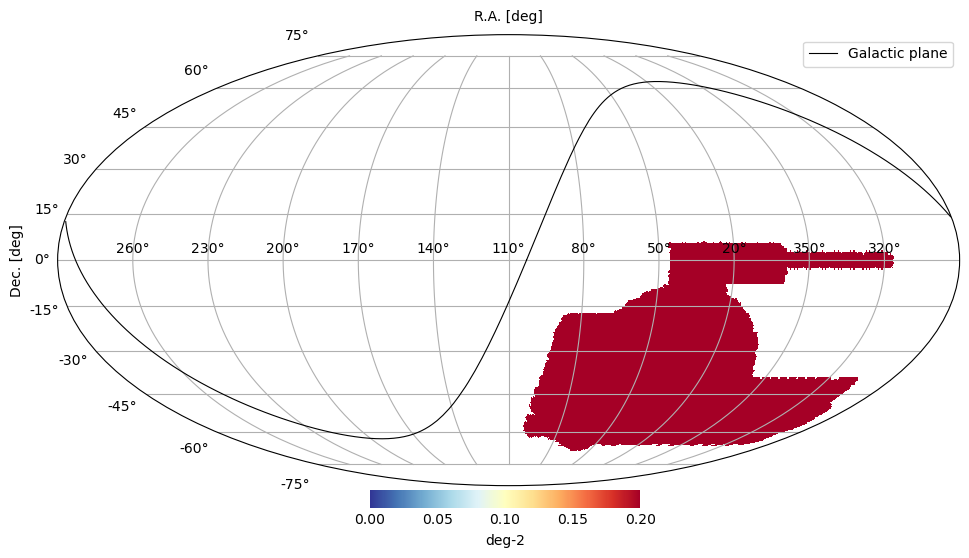

In [30]:
utils.plot_moll(hpmap_out, rot=110, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False)


In [31]:
hpmap_out_sgc = hpmap_out.copy()
hpmap_out_sgc[utils.healpix_in_sgc(hp.npix2nside(hpmap_out_sgc.size))] = 0 


In [32]:
nside=256
theta, phi = hp.pix2ang(nside, range(hp.nside2npix(nside)),nest=False)  
ra= phi*180./np.pi
dec = 90.-(theta*180./np.pi)

# hpmap_out_sgc[(dec <-10)]=0
# hpmap_out_sgc[(ra<300)] = 0 


/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


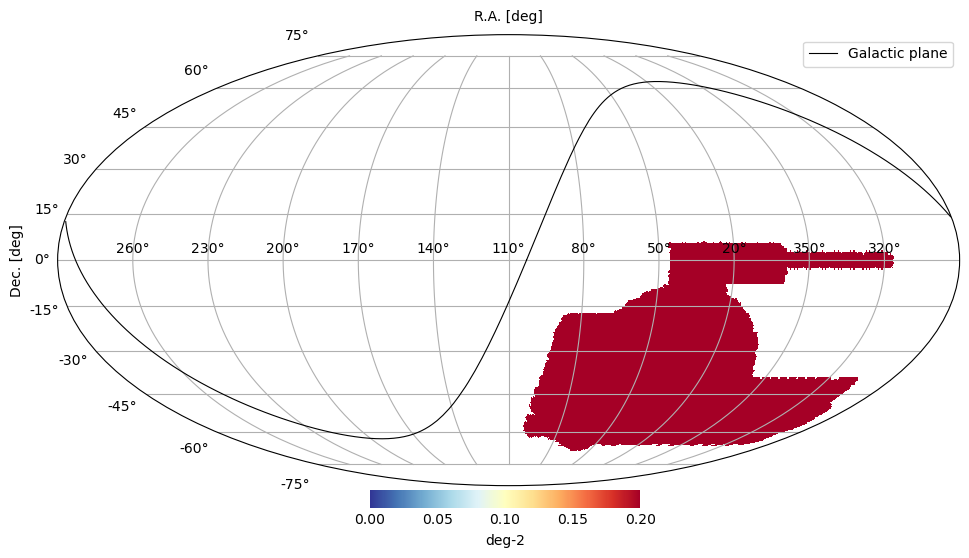

In [33]:
utils.plot_moll(hpmap_out_sgc, rot=110, min=0., max=0.2, desi_footprint=False, fourmost_footprint=False, label='deg-2', nest=False, euclid_fp=False)


In [34]:
hpmap_out_sgc.size

196608

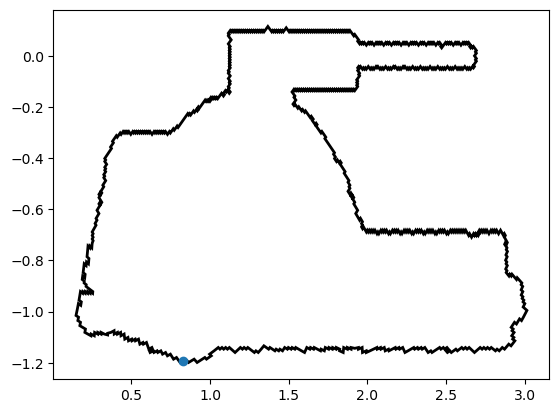

Path(array([[ 0.82829023, -1.19220164],
       [ 0.8365528 , -1.1986948 ],
       [ 0.85491404, -1.19220126],
       ...,
       [ 0.78682692, -1.17920356],
       [ 0.80946996, -1.19869522],
       [ 0.82829023, -1.19220164]], shape=(1050, 2)), None)

In [35]:
ra_center=110
#ax = ar_init_sky(desi=False, fourmost=False, ra_center=ra_center)
fig, ax = plt.subplots(1)
tt = ligo.skymap.postprocess.contour(hpmap_out_sgc,[.1])
tt = tt[0][0]
'''ra_center=np.radians(ra_center)
ra = np.remainder(np.array(tt)[:,0].reshape(len(tt),1) + 2*np.pi - ra_center, 2*np.pi)
        #
        # Scale conversion to [-180, 180].
        #
ra[ra > np.pi] -= np.pi*2
ra = ra[mask_dec]
dec= np.array(tt)[:,1][mask_dec]
ngcpoly = Path(np.vstack((-ra.T,dec)).T)'''


ra = np.array(tt)[:,0].reshape(len(tt),1)

ra = utils.projection_ra(np.rad2deg(ra), ra_center=ra_center)
dec= np.array(tt)[:,1]
ngcpoly = Path(np.vstack((ra.T,dec)).T)


patch = patches.PathPatch(ngcpoly, facecolor='w', lw=2)
ax.add_patch(patch)

ax.scatter(ngcpoly.to_polygons()[0].T[0][0], ngcpoly.to_polygons()[0].T[1][0])
'''ttt = [pd.read_csv(path, header=None) for path in glob.glob('/pscratch/sd/a/arocher/4MOST/LRG_SGC/LRG_SGC_exterior*.csv')]
for tt in ttt:
    ax.plot(ax.projection_ra(tt[0]), ax.projection_dec(tt[1]),c='r')'''

plt.show()

ngcpoly

In [36]:
np.save('mask_fp/des_fp.npy', ngcpoly.to_polygons()[0])

In [27]:
ngcpoly.to_polygons()[1]

IndexError: list index out of range